In [2]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

In [3]:
img = cv2.imread("Sudoku/sudoku.tif")
img = cv2.cvtColor(img , cv2.COLOR_BGR2GRAY)
plt.imshow(img , cmap="gray")

error: OpenCV(4.5.4-dev) D:\a\opencv-python\opencv-python\opencv\modules\imgproc\src\color.cpp:182: error: (-215:Assertion failed) !_src.empty() in function 'cv::cvtColor'


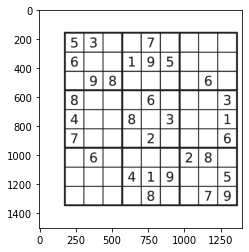

In [28]:
img = cv2.equalizeHist(img)
plt.imshow(img , cmap="gray")

In [29]:
def search_for_top_left_pixel():
    rows ,cols = img.shape
    for i in range(rows):
        for j in range(cols):
            if img[i,j] != 255:
                print("found that spot")
                print(i , j)
                return i , j
x1 , y1 = search_for_top_left_pixel()       

found that spot
150 172


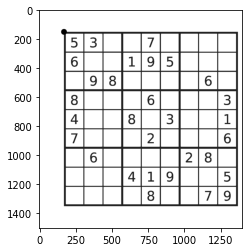

In [30]:
cv2.circle(img, (172, 150) , 20 , (0,0,0) , -1)
plt.imshow(img , cmap="gray")

In [32]:
def search_for_down_right_pixel():
    rows ,cols = img.shape
    for i in range(rows-1 , 0 , -1):
        for j in range(cols-1 , 0 , -1):
            if img[i,j] != 255:
                print("found that spot")
                print(i,j)
                return i , j
x2 , y2 = search_for_down_right_pixel()

found that spot
1349 1371


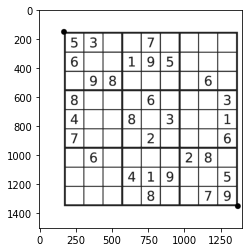

In [33]:
cv2.circle(img, (1371, 1349) , 20 , (0,0,0) , -1)
plt.imshow(img , cmap="gray")

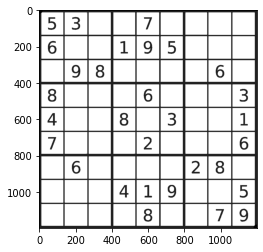

In [34]:
img_sudoku = img[x1:x2 , y1:y2]
plt.imshow(img_sudoku , cmap="gray")

In [35]:
width , height =  img_sudoku.shape
print(width , height)

1199 1199


In [36]:
def count_none_white_pixels(img):
    rows , cols = img.shape
    ten_precent_of_rows = rows//10
    ten_precent_of_cols = cols//10
    counter = 0
    for i in range(ten_precent_of_rows , rows-ten_precent_of_rows):
        for j in range(ten_precent_of_cols , cols-ten_precent_of_cols):
            if img[i , j] != 255:
                counter += 1
    return counter

In [37]:
cell_width = width//9
cell_height = height//9
print(cell_width , cell_height)

133 133


In [1]:
counter = 0
for i in range(0 , width , cell_width):
    for j in range(0 , height , cell_height):
        small_img = img_sudoku[i:i+cell_width , j:j+cell_height]
        if small_img.shape == (cell_width , cell_height):
            if count_none_white_pixels(small_img) > 500 :
                cv2.imwrite(f"Sudoku/cells/{counter}.jpg" , small_img)
                counter+=1

NameError: name 'width' is not defined